# <div align="center"> HackaGeo Final Presentation </div>

<div align="center"> 
<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/e/ef/Logo_UFF_%28blue%29.svg/320px-Logo_UFF_%28blue%29.svg.png" alt="drawing" style="width:200px;"/>
<img src="https://www.cnrd.info/files/2016/01/logo_geociencias_uff-250x87.jpg" alt="drawing" style="width:200px;"/>
<img src="https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcTT_F6cIP42sWkZUoLxMG_2xhZmiP0I7Ezcrhq28ByaWRKDf2FBG6_CEO1lRzlgwsp44eU&usqp=CAU" alt="drawing" width="200";"/> </div>
                                                                                                              
                                                                                                       
                                                                                                            

# Hackageo - Geophysics Hackathon
Hackageo is a competition sponsored by SBGF in partnership with Halliburton that takes place among students from Brazilian universities, with the objective of developing students skills through challenges involving programming and leading them to the creation of technological innovations.

The challenge is to automate a well tie process.




#  Objectives and Major Challenges

The principal objectives proposed in the **well-tie automation process** are:
* Learn how to read .las and .segy files in python;
* Aplication of different equations related to well tie;
* Convert time-based data to depth-base;
* Create different kind of wavelets to adjust with our well log;
* 

* we don't know the P-wave speed of both the sea and the upper part of the well where there is no `DT` recording
* bla bla bla

# Well-tie theory

Well to seismic ties is one of the most fundamental steps in seismic interpretation. It relates subsurface measurements obtained at a wellbore measured in depth and seismic data measured in time. The process of well tie is comprised of, mainly, the seismic signal reconstruction from well-log measurements. A time-depth relationship is typically computed by integrating the slowness function measured at a wellbore. Mis-ties are often present and adjustments to the time-depth relationship should be done to solve it. 

The image below was taken from the book *An Introduction to Geophysical Exploration* (from Philip Kearey, Michael Brooks, and Ian Hill) and shows us four different components for the same section. From left to right, we have:

* The geological section;
* The acoustic impedance profile;
* The reflection coefficient profile;
* And after being convolved with the source wavelet, we obtain the signal the well location (shown in the upper part as a synthetic seismogram);

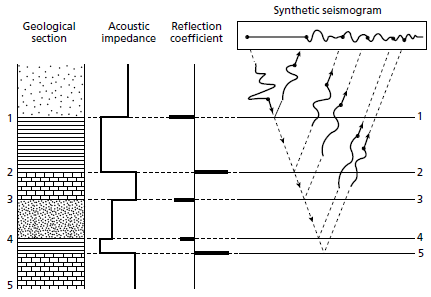

So, if one does have the Geological section, or the Acoustic Impedance profile, or Reflection Coefficient profile, it is possible to calculate a synthetic seismic trace corresponding to that location. **Recovering this synthetic signal that matches the measured signal is the proccess of well-tieing**.

# Well-tie calculus

Synthetic seismograms can be created by doing basic calculus on travel-time functions. Integrating vagarosity (the inverse of velocity) we can yield a time-to-depth relationship for making our well tie. In effect, the integral tells us where a given interval of rock is in time-domain, the derivative tells us what it should look like: its seismic character.

Going through the process backwards, we need to recover the synthetic seismogram by convolving the wavelet with the Reflection Coefficient profile (in the time domain). First, we start with the Reflection Coefficient profile, obtained through the application of the Zoeppritz equation to each adjacent two-points in the Acoustic Impedance profile.

<center> $R = {Z_i-Z_{i-1}  \over Z_i+Z_{i-1}}$ </center>


The Acoustic Impedance profile can be obtained by the point-wise multiplication of the density profile (aka **RHOB**) by the *inverse* of the sonic profile (aka **DT**)

<center> $Z_i = \rho_i . V_i $ </center>

and the sonic profile yields the **vagarosity** (usually in $\mu s/ft$), the **inverse of the velocity**.

As we see, the Reflection Coefficient profile is obtained in the depth domain, because RHOB and DT are in the depth domain. However, in the synthetic seismogram recovery process, the convolution with the wavelet (in the time domain) must occur in the same domain. As our seismic signal has time units (two-way travel time), we have to compare them in the time-domain. So, we need our Reflection Coefficient profile to the time-domain. To do so, we need to estimate an **time to depth (T-D) conversion**.

# Generating Synthetic Seismogram in Python

In this project, synthetic seismogram will be generated using sonic and density well logs. To recognize our formation tops on seismic profiles (horizons), we mainly rely on well data. Well data includes petrophysical well logs and geological interpretation such as key formation boundries. Tying well data on seismic data is more precise when we generate synthetic seismogram. 

The next steps required to generate seismogram are:<br>
1. Data Preparation (Unit conversion and Sonic / Density Logs processing) <br>
2. Time-Depth relationship construction<br>
3. Acoustic Impedance (AI or Z) Calculation, AI (product of sonic wave velocity and medium density)<br>
4. Reflection Coefficient (Rc) calculation<br>
5. Resampling Rc to the time domain<br>
6. Wavelet & Convolution<br>
7. Visualization<br>

## (Geo)Python packages

For this solution we used:
* `lasio`: learn more about it [here](https://lasio.readthedocs.io/en/latest/)
* `welly`: learn more about it [here](https://github.com/agile-geoscience/welly)
* `segysak`: learn more about it [here](https://segysak.readthedocs.io/en/latest/index.html)

In [ ]:
import os
os.chdir("..")

# This package is used to locate a file in a different fold than the code fold. 

## 1 - Data Prepration

At this stage, we implemet some data operation (like smoothing/despiking).  
The welly library was developed by [agile geoscience](https://agilescientific.com) team. 

In [ ]:
import welly
from welly import Well
import pandas as pd
import lasio
import numpy as np

In [ ]:
from src.wellTie import *

json_path = 'data/inputs_hackageo.json'
# user inputs `ui` passed as a json file
ui = read_inputs(json_path)

ui

{'well': 'data/6507_8-1_DT_RHOB.LAS',
 'seismic': 'data/full_offset-cmp_02.sgy',
 'wavelet': '',
 'uwi_poco': 'x',
 'nome_poco': 'y',
 'nome_synth': 'z',
 'nome_td': 'w',
 'kb': 29.0,
 't_water_botton': 0.472}

In [ ]:
# read data defined in the input file
data = read_data(ui)

/home/hackgeo05/anaconda3/envs/HackGeo/lib/python3.8/site-packages/welly/well.py:194: FutureWarning: From v0.5 the default will be 'original', keeping whatever is used in the LAS file. If you want to force conversion to metres, change your code to use `index='m'`.
  warnings.warn(m, FutureWarning)
100%|██████████| 427k/427k [00:32<00:00, 13.1k traces/s]
Converting SEGY:   0%|          | 1.00/427k [00:00<07:52, 903 traces/s]

Couldn't determine geometry, will load traces as flat 2D.


In [ ]:
data['well']

Well(uwi: 'NO 6507/8-1', 2 curves: ['DT', 'RHOB-EDIT'])

explicações

In [ ]:
data['seismic']

,t,tr_synth,tr_seis
0,0.000,0.0,0.019881
1,0.004,0.0,-0.011192
2,0.008,0.0,-0.014751
3,0.012,0.0,0.004942
4,0.016,0.0,-22.820679
...,...,...,...
996,3.984,0.0,-2458.625977
997,3.988,0.0,-1794.710938
998,3.992,0.0,-675.822510
999,3.996,0.0,497.201660


In [ ]:
# pre-processing of data
data = pre_processing_data(data)

data['well']

,DT,RHOB-EDIT,RHOB,DT_DS,RHOB_DS,DT_DS_SM,RHOB_DS_SM
Depth,,,,,,,
1183.9956,390.357612,NaN,0.0,390.357612,0.0,396.012921,0.000000
1184.1480,390.666010,NaN,0.0,390.666010,0.0,396.373107,0.000000
1184.3004,387.755906,NaN,0.0,387.755906,0.0,396.786796,0.000000
1184.4528,386.486220,NaN,0.0,386.486220,0.0,397.233242,0.000000
1184.6052,389.120735,NaN,0.0,389.120735,0.0,397.704623,0.000000
...,...,...,...,...,...,...,...
2599.4868,0.000000,NaN,0.0,0.000000,0.0,0.000000,1056.135385
2599.6392,0.000000,NaN,0.0,0.000000,0.0,0.000000,1092.553846
2599.7916,0.000000,NaN,0.0,0.000000,0.0,0.000000,1128.972308


#### Unit Conversion

To calculate Acoustic Impedance, we need to have Sonic log (DT) in µs/m unit as well as density log (RHOB) in kg/m3. Looking at header: DT has us/ft unit and RHOB g/cm3. 
* 1 feet = 0.3048 m
* 1 g/cm3 = 1000 kg/m3

#### Despiking & Smoothing

Spikes are common on well logs, especially on sonic measurements. These spikes are not the true representative of rock properties variation through the well intervals and need to be eliminated.


```
def despike(self, window_length=33, samples=True, z=2):
        """
        Args:
            window (int): window length in samples. Default 33 (or 5 m for
                most curves sampled at 0.1524 m intervals).
            samples (bool): window length is in samples. Use False for a window
                length given in metres.
            z (float): Z score
        Returns:
            Curve.
        """
```




We will input despiked data to be smoothed.  
`samples = False` means that the `window_length` will be given in meters. The `func1d` argument (not used) defines the function to be used as smoother. The standard is `numpy.mean()`.

## 2 - Time-Depth relationship 

Seismic data is measured in the time domain while well data mainly have depth domain. To convert time to depth and vice versa, we need to establish a relationship. There are several ways to do this but here we will use the sonic log, which is reciprocal of sound wave velocity.

**Mathematically if we integrate DT over depth interval, we will compute the time-to-depth relationship**. Before that, we should make a remedy for the upper part log data which has a data gap from the surface. As this is on-shore field data, we do not have a water column.
The replacement velocity for the section above log is almost 2600 m/s. Simply, dividing gapped interval thickness (log start depth subtracted from kb) by replacement velocity will give us the time.

The image below (from dGBES) will help us understand what it takes to solve this problem.  
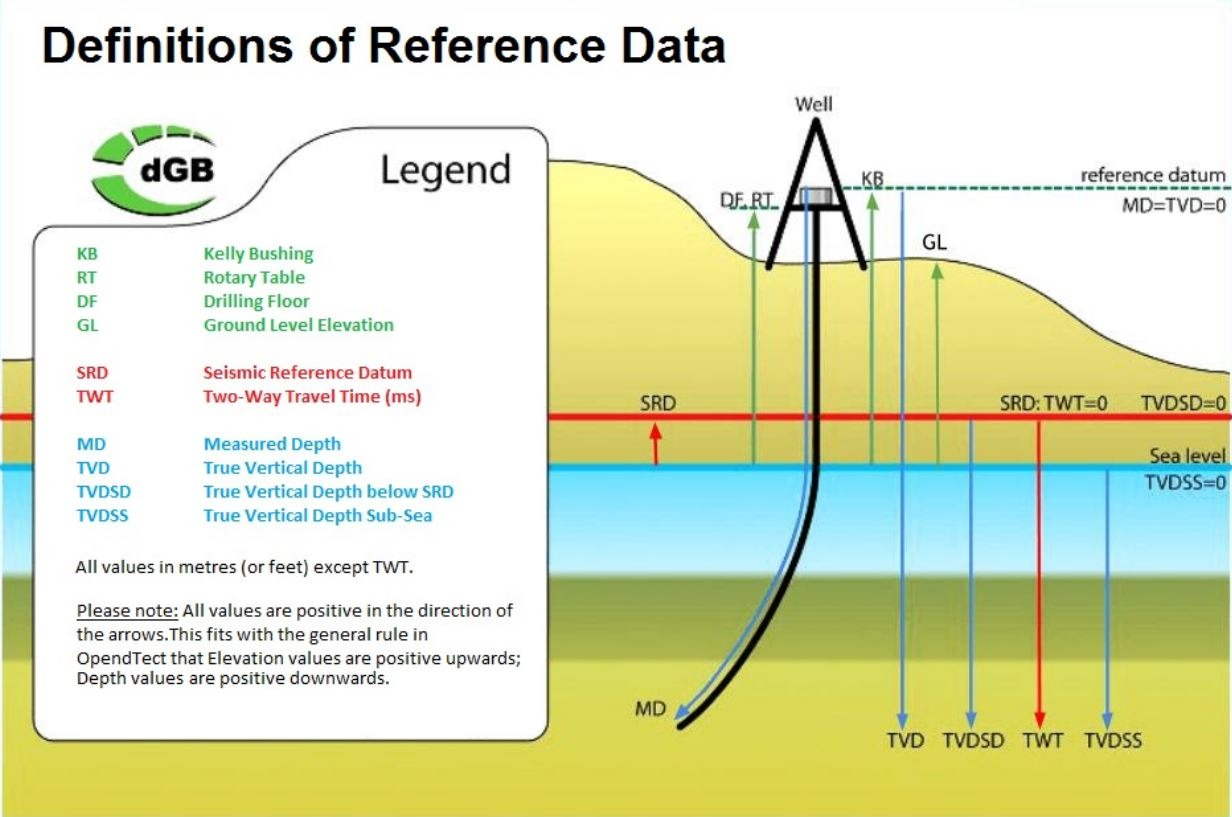

#### T-D Establishment

Let's implement integration. As depth sampling interval is 0.1524 meter, we need:
1. to calculate the time that takes for the P-wave from the sonic log to travel each thickness sampled interval (`= 0.1524`). 
1. Then calculate cumulative travel time downward. 
  * Calculating from *log starting depth* shows zero for first value while we know zero time belongs to ground surface to the seismic TWT. So, the travel time of this gap should be added to integrated sonic time.


Let's convert well data into dataframe to work more flexibly in Pandas

In [ ]:
# time-depth relationship `tdr` from DT
data = time_depth_relationship(data, ui)

data['well']

,DT,RHOB-EDIT,RHOB,DT_DS,RHOB_DS,DT_DS_SM,RHOB_DS_SM,TWT
Depth,,,,,,,,
1183.9956,390.357612,NaN,0.0,390.357612,0.0,396.012921,0.000000,1.120109
1184.1480,390.666010,NaN,0.0,390.666010,0.0,396.373107,0.000000,1.120228
1184.3004,387.755906,NaN,0.0,387.755906,0.0,396.786796,0.000000,1.120346
1184.4528,386.486220,NaN,0.0,386.486220,0.0,397.233242,0.000000,1.120464
1184.6052,389.120735,NaN,0.0,389.120735,0.0,397.704623,0.000000,1.120583
...,...,...,...,...,...,...,...,...
2599.4868,0.000000,NaN,0.0,0.000000,0.0,0.000000,1056.135385,2.231738
2599.6392,0.000000,NaN,0.0,0.000000,0.0,0.000000,1092.553846,2.231738
2599.7916,0.000000,NaN,0.0,0.000000,0.0,0.000000,1128.972308,2.231738


## 3 - Acoustic Impedance 

Acoustic Impedance(AI, sometimes showed by Z) is defined as the product of sonic wave velocity and medium density. In reflection seismology, AI variation between geological layers is responsible for the energy reflection toward the surface where we collect seismic data. 

To sum up, we need to implement the equation below.

<center> $Z_i = \rho_i . V_i $ </center>

In [ ]:
# acoustic impedance
data = ai(data)

data['well']

,DT,RHOB-EDIT,RHOB,DT_DS,RHOB_DS,DT_DS_SM,RHOB_DS_SM,TWT,Vsonic,AI
Depth,,,,,,,,,,
1183.9956,390.357612,NaN,0.0,390.357612,0.0,396.012921,0.000000,1.120109,2525.170129,0.0
1184.1480,390.666010,NaN,0.0,390.666010,0.0,396.373107,0.000000,1.120228,2522.875497,0.0
1184.3004,387.755906,NaN,0.0,387.755906,0.0,396.786796,0.000000,1.120346,2520.245155,0.0
1184.4528,386.486220,NaN,0.0,386.486220,0.0,397.233242,0.000000,1.120464,2517.412676,0.0
1184.6052,389.120735,NaN,0.0,389.120735,0.0,397.704623,0.000000,1.120583,2514.428903,0.0
...,...,...,...,...,...,...,...,...,...,...
2599.4868,0.000000,NaN,0.0,0.000000,0.0,0.000000,1056.135385,2.231738,0.000000,0.0
2599.6392,0.000000,NaN,0.0,0.000000,0.0,0.000000,1092.553846,2.231738,0.000000,0.0
2599.7916,0.000000,NaN,0.0,0.000000,0.0,0.000000,1128.972308,2.231738,0.000000,0.0


## 4 - Reflection Coefficient 

Reflection Coefficient (Rc) is defined as impedance differences of two adjacent layers divided by their sum. Mathematically, this is derivative with respect to depth. We only need to implement equation below then correct for the vector size to assure that the size is the same as others; duplicating the last element suffices.

<center> $R = {Z_i-Z_{i-1}  \over Z_i+Z_{i-1}}$ </center>



In [ ]:
# reflectivity coefficients `rc` profile (in time)
data = rc_time(data)

data['well_tdom']

0                                                        0.0
1                                                      0.004
2                                                      0.008
3                                                      0.012
4                                                      0.016
                                 ...                        
998                                                    3.992
999                                                    3.996
1000                                                     4.0
Rc_tdom    [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...
AI_tdom    [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...
Name: t, Length: 1003, dtype: object

## 5 - Resampling to the time domain and Rc calculation

Although we established a time-depth relationship (TDR), the components that we need for synthetic seismogram are in depth domain. Reflectivity series should be transferred into time domain for convolution. After defining the time vector, we can use the interpolation function from the numpy library.



```
def interp(x, xp, fp, left=None, right=None, period=None):
    """
    One-dimensional linear interpolation for monotonically increasing sample points.
    Returns the one-dimensional piecewise linear interpolant to a function
    with given discrete data points (`xp`, `fp`), evaluated at `x`.
    Parameters
    ----------
    x : array_like
        The x-coordinates at which to evaluate the interpolated values.
    xp : 1-D sequence of floats
        The x-coordinates of the data points, must be increasing if argument
        `period` is not specified. Otherwise, `xp` is internally sorted after
        normalizing the periodic boundaries with ``xp = xp % period``.
    fp : 1-D sequence of float or complex
        The y-coordinates of the data points, same length as `xp`.
    left : optional float or complex corresponding to fp
        Value to return for `x < xp[0]`, default is `fp[0]`.
    right : optional float or complex corresponding to fp
        Value to return for `x > xp[-1]`, default is `fp[-1]`.
    period : None or float, optional
        A period for the x-coordinates. This parameter allows the proper
        interpolation of angular x-coordinates. Parameters `left` and `right`
        are ignored if `period` is specified.
        .. versionadded:: 1.10.0
    Returns
    -------
    y : float or complex (corresponding to fp) or ndarray
        The interpolated values, same shape as `x`.
```



After resampling, if we check AI vector size, it will be definitley different from original one 

## 6 - Wavelet & Convolution

In reflection seismology, it is assumed that the seismic data we record on the surface is the reflection of energy (due to rock property variation in depth) which is convolved (masked) with wavelet.
From various wavelets, Ricker is one of the most common type as it is zero phase and favorable for seismic interpretation tasks.


#### Ricker wavelet
You may look as the full explanation of this wavelet [here](https://subsurfwiki.org/wiki/Ricker_wavelet). The formula we need to implement is:

<center> $A = (1-2 \pi^2 f^2 t^2) e^{-\pi^2 f^2 t^2}$ </center>

In [ ]:
# define function of ricker wavelet
def ricker(f, length, dt):
    """
    Description
    -----------
        Creates a Ricker wavelet

    Parameters
    ----------
        f: float
            the main frequency of the wavelet
        length: float
            the length in seconds
        dt: float
            the sampling time interval in seconds

    Returns
    -------
        t0: numpy.ndarray
            the time vector
        y:  numpy.ndarray
            the amplitude of the wavelet
    """
    t0 = np.arange(-length/2, (length-dt)/2, dt)
    y = (1.0 - 2.0*(np.pi**2)*(f**2)*(t0**2)) * np.exp(-(np.pi**2)*(f**2)*(t0**2))
    return t0, y

#### Convolution
In this step, we will convolve the reflectivity series with a wavelet to create a synthetic seismogram. It is commonly known as *flip-and-slide* a function over the other one. If you are interested to know the mathematic behind this operation you may look at this great [video](https://www.youtube.com/watch?v=eqAFP15AMPc).

This image, taken from *An Introduction to Geophysical Exploration* (Kearey, Brooks and Hill, 2009), explicts the **convolution between two digital signals** (exactly what we have here). It is an iterative cross-products of one "stationary" function/vector with a sliding one.

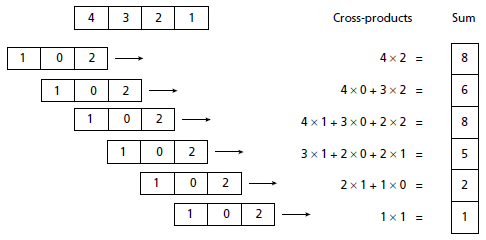

For the Ricker wavelet evaluation, we need to define:
* its frequency
* its vector lenght
* its sampling

Then we calculate the Ricker wavelet to recover the synthetic seismogram.

Now let's do some simple visual checking.

In [ ]:
# convolution of the wavelet with `rc` to obtain the synthetic seismogram
data = synthetic_seismogram(data)

data['seismic'].head()

Best wavelet: f = 11.60, index roll = -6 and corr = 0.191


,t,tr_synth,tr_seis
0,0.000,0.0,0.019881
1,0.004,0.0,-0.011192
2,0.008,0.0,-0.014751
3,0.012,0.0,0.004942
4,0.016,0.0,-22.820679


## 7 - Visualization

#### Formation tops 

Well tops are one of the most import ingredients for seismic interpretation. Let's read from csv file into dataframe and convert it to dictionary.

To find out the corresponding time value of tops in depth dictionary, we can either use velocity function to convert depth to time by very small error or find out the nearest value to the MD. We prefer the nearest value for tops in depth interval for simplicity. 

First, define a function to be able to iterate over the depth values. `argmin` function is used to find out the values with the smallest difference from our intended value.

### Figure 1 - well logs + AI + Rc in **depth** domain

In this figure, we will plot the well logs (overlaid with smooting and despiking results) and calculated AI and Reflectivity in depth domain.

In [ ]:
fig, axs = plt.subplots(1, 6, sharey=True, figsize = (14,10), gridspec_kw={'width_ratios': [0.7,2,2,2,2,1.5]})
fig.subplots_adjust(wspace=0.1)
# -----------------------------------------------------------------------------------track1------------
axs[0].set_title('Tops', style = 'normal')
axs[0].set_ylabel('measured depth(m) ', fontsize = '14' )
axs[0].set_xticklabels('')
for Top in tops_dept.values() :
    axs[0].axhline( y = float(Top), color = 'k', lw = 1,   
                            alpha = 0.8, xmin = 0.05, xmax = 0.95 )
for Top, MD in tops_dept.items():
    axs[0].text( x = 0.5,  y = float(MD), s = Top,fontsize = '10', 
                horizontalalignment = 'center',verticalalignment = 'bottom')
# -----------------------------------------------------------------------------------track2------------
axs[1].plot( df.DT, df.index,'c', alpha=0.8)
axs[1].plot( df.DT_DS_SM, df.index,'m', alpha=0.9)
axs[1].set_title('DT & Despike_Smooth', style = 'normal')
axs[1].set_xlabel( r'$\mu s/m $', fontsize = '12')
axs[1].set_ylim(1000, 5000)
axs[1].invert_yaxis()
axs[1].grid()
# -----------------------------------------------------------------------------------track3------------
axs[2].plot( df.RHOB, df.index,'r', alpha=0.6)
axs[2].plot( df.RHOB_DS_SM, df.index,'b', alpha=0.9)
axs[2].set_title('RHOB & Despike_Smooth', style = 'normal')
axs[2].set_xlabel('$kg/cc$', fontsize = '12')
axs[2].set_ylim(1000, 5000)
axs[2].invert_yaxis()
axs[2].grid()
# -----------------------------------------------------------------------------------track4------------  
axs[3].plot( df.AI, df.index,'k', alpha=0.8)
axs[3].set_title('Acoustic Impedance', style = 'normal')
axs[3].set_xlabel( r'$kg/m^2s^2$', fontsize = '12')
axs[3].set_ylim(1000, 5000)
axs[3].invert_yaxis()
axs[3].grid()
# -----------------------------------------------------------------------------------track5-----------
axs[4].plot( df.Rc, df.index,'k', alpha=0.8)
axs[4].set_title('Reflection Coefficient', style = 'normal')
axs[4].set_xlabel('fraction' , fontsize = '12')
axs[4].set_ylim(1000, 5000)
axs[4].set_xlim(-0.01, 0.01)
axs[4].invert_yaxis()
axs[4].grid()
# -----------------------------------------------------------------------------------track6------------
axs[5].plot( df.TWT, df.index,'r', alpha=0.9)
axs[5].set_title('Time-Depth', style = 'normal')
axs[5].set_xlabel( '$seconds$', fontsize = '12')
axs[5].set_ylim(1000, 5000)
axs[5].invert_yaxis()
# axs[5].set_yticklabels('')
axs[5].grid()
plt.savefig('Fig1.png', dpi=300)

### Figure 2 - AI + convolution in **time** domain
In this figure, we will plot AI and colvolution results in time domain. We also have an access to real surface seismic tracess around a well that can juxtapose with synthetic seismogram to see how match with that data.

In [ ]:
seismic_well_path = '/content/Synthetic_Seismogram/around_well_seismic.csv'
df_offset_seis= pd.read_csv(seismic_well_path)

In [ ]:
fig, axs = plt.subplots(1, 6, sharey=False, figsize = (14,8), gridspec_kw={'width_ratios': [0.7,2,2,0.7,1,2.8]})
fig.subplots_adjust(wspace=0.1)
# -----------------------------------------------------------------------------------track1------------
axs[0].set_title('Tops', style = 'normal')
axs[0].set_ylabel('Two Way Time(s) ', fontsize = '14' )
axs[0].set_xticklabels('')
axs[0].set_ylim(1 , 2.6)
axs[0].invert_yaxis()

for Top in tops_twt.values() :
    axs[0].axhline( y = float(Top), color = 'k', lw = 1,   
                            alpha = 0.8, xmin = 0.05, xmax = 0.95 )
for Top, S in tops_twt.items():
    axs[0].text( x = 0.5,  y = float(S), s = Top,fontsize = '10', 
                horizontalalignment = 'center',verticalalignment = 'bottom')
# -----------------------------------------------------------------------------------track2------------
axs[1].plot( AI_tdom, t,'b', alpha=0.8)
axs[1].set_title('Acoustic Impedance', style = 'normal')
axs[1].set_xlabel( r'$kg/m^2s^2$', fontsize = '10')
axs[1].set_ylim(1 , 2.6)
axs[1].set_yticklabels('')
axs[1].invert_yaxis()
axs[1].grid()
# -----------------------------------------------------------------------------------track3------------
axs[2].plot( Rc_tdom, t,'k')
axs[2].plot([0, 0], [t.min(), t.max()], '-', c='k')
axs[2].set_title('Reflectivity', style = 'normal')
axs[2].set_ylim(1 , 2.6)
axs[2].set_xlim(-0.2 , 0.2)
axs[2].set_yticklabels('')
axs[2].invert_yaxis()
axs[2].grid()
# -----------------------------------------------------------------------------------track4------------   
axs[3].plot( w, t0+1.4,'r', alpha=0.99)
axs[3].fill_betweenx(t0+1.4 , w,  0,  w > 0.0,  color='r')
axs[3].set_title('Wavelet', style = 'normal')
axs[3].set_xlabel('F:'+ str(f)+'Hz' , fontsize = '10')
axs[3].set_yticklabels('')
axs[3].set_ylim(1 , 2.6)
axs[3].invert_yaxis()
# -----------------------------------------------------------------------------------track5------------
axs[4].plot( synthetic, t ,'r')
axs[4].fill_betweenx(t, synthetic,  0,  synthetic > 0,  color='r')
axs[4].set_title('Synthetic', style = 'normal')
axs[4].set_ylim(1 , 2.6)
axs[4].set_xlim(-0.8 , 0.8)
axs[4].invert_yaxis()
axs[4].set_yticklabels('')
axs[4].grid()
# -----------------------------------------------------------------------------------track6------------
offsets=[0.4, 0.8 , 1.25, 1.7, 2.1]

x1= (df_offset_seis.cdp409.values/1e5) + offsets[0]
x2= (df_offset_seis.cdp410.values/1e5) + offsets[1]
x3= (df_offset_seis.cdp412.values/1e5) + offsets[3]
x4= (df_offset_seis.cdp413.values/1e5) + offsets[4]
t_sei=df_offset_seis.time

axs[5].plot( x1, t_sei ,'k')
axs[5].fill_betweenx(t_sei, offsets[0] , x1, where=(x1>offsets[0]),color='k')
axs[5].plot( x2, t_sei ,'k')
axs[5].fill_betweenx(t_sei, offsets[1] , x2, where=(x2>offsets[1]),color='k')
axs[5].plot( synthetic+offsets[2], t ,'r')
axs[5].fill_betweenx(t, offsets[2] , (synthetic+offsets[2]),
                     where=((synthetic+offsets[2])>offsets[2]),color='r')
axs[5].plot( x3, t_sei ,'k')
axs[5].fill_betweenx(t_sei, offsets[3] , x3, where=(x3>offsets[3]),color='k')
axs[5].plot( x4, t_sei ,'k')
axs[5].fill_betweenx(t_sei, offsets[4] , x4, where=(x4>offsets[4]),color='k')

axs[5].set_title(' Seismic & Synthetic', style = 'normal')
axs[5].set_yticklabels('')
axs[5].set_xticklabels('')
axs[5].set_ylim(1 , 2.6)
axs[5].set_xlim(0 , 03.5)
axs[5].invert_yaxis()
for Top in tops_twt.values() :
    axs[5].axhline( y = float(Top), color = 'b', lw = 0.8, ls = ':', 
                   alpha = 0.8, xmin = 0.05, xmax = 0.95 )
for Top, S in tops_twt.items():
    axs[5].text( x = 3.2,  y = float(S), s = Top,fontsize = '10', 
                horizontalalignment = 'center',verticalalignment = 'bottom')    

plt.savefig('Fig2.png', dpi=600)

## The Pearson correlation coefficient R

The **Pearson correlation coefficient** ― also known as Pearson's R, the Pearson product-moment correlation coefficient, the bivariate correlation, or colloquially simply as *the correlation coefficient* ― is a measure of linear correlation and dependence|correlation between two sets of data. It is the ratio between the covariance of two variables and the product of their standard deviations; thus it is essentially a normalised measurement of the covariance, such that the result always has a value between −1 and 1. For a sample of pointis, it is given by

<center> $R_{xy} =\frac{\sum ^n _{i=1}(x_i - \bar{x})(y_i - \bar{y})}{\sqrt{\sum ^n _{i=1}(x_i - \bar{x})^2} \sqrt{\sum ^n _{i=1}(y_i - \bar{y})^2}}$ </center>

The [`numpy.corrcoef`](https://numpy.org/doc/stable/reference/generated/numpy.corrcoef.html) calculates the covariance matrix (that can be regarded as their correlation coefficient) between a pair of discrete signals. It can be a quantitative measurement of how well the two signals correlate.

The `numpy.corrcoef` requires both inputs of the same size. Let's check if our recovered seismogram has the same shape of the measured seismic signals just loaded.

To have both signals with the same shape, we can use `numpy.interp` to reduce the size of the signal.

Now, let's plot the signals together to check how they correlate visually to confirm the interpolation went well.

Now that the signals have the same size and are evaluated at the same positions (given by `t_sei`) we can calculate their correlation coefficient.

In [ ]:
# export data to Decision Workspace
export_data(data, ui)